In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps
import scipy.stats as stats
import math
import time
from scipy.special import gamma
from scipy.stats import uniform ,expon, gamma as gamma_dist

In [6]:
alpha, n = 2 , 1000
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
#s = np.random.gamma(shape, scale, 1000)

In [7]:
# function for draw exponential distribution of paramter alpha by inverse transform method using uniform distribution
def exp_gen(alpha,n):
    uni_random_array = np.random.rand(n)
    exp_random_array = -np.log(uni_random_array)/alpha
    return exp_random_array

In [8]:
# Generating gamma(a,b) when a is an integer. Exp(a) variate and multiply b with it
def gamma_gen_int(a,b,n):
    gamma_random_array_int = np.zeros(n)
    for i in range(n):
        gamma_random_array_int[i] = np.sum(exp_gen((1/b),a))
    return gamma_random_array_int

Time taken to draw 1000 samples from Gamma distribution: 0.008900 seconds


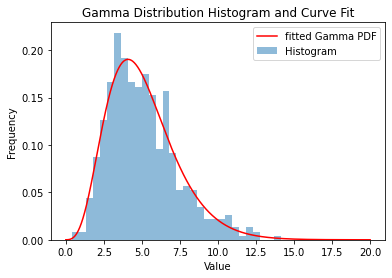

In [41]:
# Random samples drawn from gamma distribution when a is an integer by transformation method


start_time = time.time()
samples_int = gamma_gen_int(5, 1, 500)
end_time = time.time()
plt.hist(samples_int, bins=30, density=True, alpha=0.5, label='Histogram')

# Fit a curve to the histogram using the Gamma distribution
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(samples_int)
x = np.linspace(0, 20, 1000)
y = stats.gamma.pdf(x, fit_alpha, fit_loc, fit_beta)
plt.plot(x, y, 'r', label='fitted Gamma PDF')

# Set the title and axis labels
plt.title('Gamma Distribution Histogram and Curve Fit')
plt.xlabel('Value')
plt.ylabel('Frequency')



print("Time taken to draw {} samples from Gamma distribution: {:.6f} seconds".format(n,end_time - start_time))

# Show the legend and plot
plt.legend()
plt.show()

In [ ]:
# Generating gamma(a,b) when a is an non integer. let a = m+q. Exp(m) variates and multiply b with it

def gamma_gen_nonint(a,b,n):
    gamma_random_array_nonint = np.zeros(n)
    m = np.floor(a) 
    q = a - m
    beta = exp_gen(1,1)/(exp_gen(1,1) + exp_gen(1-q,1))
    for i in range(n):
        gamma_random_array_int[i] = b*exp_gen(m,1)  - beta*exp_gen(1,1)
    return gamma_random_array_nonint

acceptance rejection method 1 : Using the exponential distribution only.

In [10]:
# function for acceptance rejection method for drawing gamma using the exponential

def gamma_sample_exp(alpha, beta, n):
   
    lambd = 1/alpha  # choice of b is based on minimizing the expected number of simulations
    
    # M = gamma(m) / gamma(alpha) * b ** m * (alpha * np.exp(-1)) ** (alpha - m)
    
    c =  (1/(gamma(alpha) *lambd)) * ((alpha - 1)/(1 - lambd))**(alpha - 1)*(math.exp(-1)) ** (alpha - 1)
    
    samples = []
    while len(samples) < n:
        # Generate a proposal sample from the exponential distribution
        x = exp_gen(lambd,1)         #x = exp_dist.rvs() 
        
        p =  x**(alpha -1)*(math.exp(-1)**(x*(1-lambd)))/(gamma(alpha) *lambd*c)
        
        # Generate a uniform random number between 0 and 1
        u = np.random.uniform()
        
        # Accept the sample if u < p, else reject it
        if u < p:
            x = x/beta
            samples.append(x)
    
    return np.array(samples)

Time taken to draw 1000 samples from Gamma distribution: 0.069000 seconds with acceptance probablity 0.39919688419716015


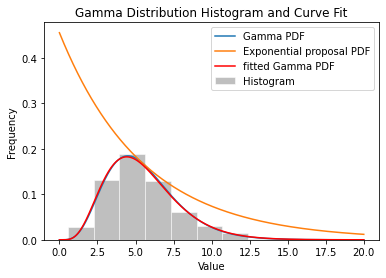

In [43]:
# Random samples drawn from gamma distribution by acceptance rejection method
alpha, beta = 5.5 ,1 
n = 1000
lambd = 1/alpha
d = (1/(gamma(alpha) *lambd)) * ((alpha - 1)/(1 - lambd))**(alpha - 1)*(math.exp(-1)) ** (alpha - 1)

start_time = time.time()
samples_accrej_exp = gamma_sample_exp(alpha, beta , n)
end_time = time.time()


plt.hist(samples_accrej_exp,  density=True, alpha=0.5, label='Histogram',color="gray", edgecolor="white")


x = np.linspace(0, 20,n)

plt.plot(x, gamma_dist.pdf(x,alpha,scale = (1/beta)),label='Gamma PDF')
plt.plot(x, d*expon.pdf(x,scale = (1/lambd)),label='Exponential proposal PDF')

# Fit a curve to the histogram using the Gamma distribution
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(samples_accrej_exp)
x = np.linspace(0, 20, 1000)
y = stats.gamma.pdf(x, fit_alpha, fit_loc, fit_beta)
plt.plot(x, y, 'r', label='fitted Gamma PDF')


print("Time taken to draw {} samples from Gamma distribution: {:.6f} seconds with acceptance probablity {}".format(n,end_time - start_time, (1/d)))

# Set the title and axis labels
plt.title('Gamma Distribution Histogram and Curve Fit')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the legend and plot
plt.legend()

plt.show()

acceptance rejection method 2 : Using the gamma distribution only.

In [12]:
# function for acceptance rejection method for drawing gamma using the gamma

def gamma_sample_gam(alpha, beta, n):
    # Define the proposal distribution, which is an gamma distribution
    
    m = int(np.floor(alpha))
    b = (m/alpha)  # choice of b is based on minimizing the expected number of simulations
    
    # M = gamma(m) / gamma(alpha) * b ** m * (alpha * np.exp(-1)) ** (alpha - m)
    
    c = (gamma(m) / gamma(alpha)) * ((1 ** alpha)/(b ** m ))* ((alpha - m)/(1 - b ))**(alpha - m)*(math.exp(-1)) ** (alpha - m)
    
    samples = []
    while len(samples) < n:
        # Generate a proposal sample from the exponential distribution
        x = gamma_gen_int(m,b,1)         #x = exp_dist.rvs() 
        
        # Calculate the acceptance probability
        p = ((beta ** alpha)/(b ** m ))*x**(alpha -m)*(math.exp(-1)**(x*(beta-b)))/c
        
        # Generate a uniform random number between 0 and 1
        u = np.random.uniform()
        
        # Accept the sample if u < p, else reject it
        if u < p:
            x = (x/beta)
            samples.append(x)
    
    return np.array(samples)

Time taken to draw 1000 samples from Gamma distribution: 0.038672 seconds with acceptance probablity 0.9520242156852893


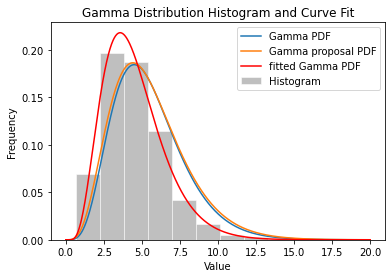

In [44]:
# Random samples drawn from gamma distribution by acceptance rejection method
alpha, beta = 5.5 ,1 
m = int(np.floor(alpha))
n = 1000
b = beta*(m/alpha)
c = gamma(m) / gamma(alpha) *((beta ** alpha)/(b ** m ))* ((alpha - m)/(beta - b ))**(alpha - m)*(math.exp(-1)) ** (alpha - m)

start_time = time.time()
samples_accrej_gam = gamma_sample_gam(alpha, beta , n)
end_time = time.time()

plt.hist(samples_accrej_gam,  density=True, alpha=0.5, label='Histogram',color="gray", edgecolor="white")


print("Time taken to draw {} samples from Gamma distribution: {:.6f} seconds with acceptance probablity {}".format(n,end_time - start_time, (1/c)))


x = np.linspace(0, 20,n)
plt.plot(x, gamma_dist.pdf(x,alpha,scale=(1/beta)),label='Gamma PDF')
plt.plot(x, c*gamma_dist.pdf(x,m,scale=(1/b)),label='Gamma proposal PDF')

# Fit a curve to the histogram using the Gamma distribution
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(samples_accrej_gam)
x = np.linspace(0, 20, 1000)
y = stats.gamma.pdf(x, fit_alpha, fit_loc, fit_beta)
plt.plot(x, y, 'r', label='fitted Gamma PDF')



# Set the title and axis labels
plt.title('Gamma Distribution Histogram and Curve Fit')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the legend and plot
plt.legend()

plt.show()

acceptance rejection method 3 : Using the Normal distribution only.

In [26]:
# function for acceptance rejection method for drawing gamma using the normal

def gamma_sample_normal(alpha, beta, n):
    
    samples = []
    while len(samples) < n:
            d = alpha - 1/3 
            c = 1/math.sqrt(9*d)
            # Generate a proposal sample from the normal distribution
            x = np.random.normal(0, 1, 1)[0]
            if x > -1/c:
                v = (1+c*x)**3
            # Generate a uniform random number between 0 and 1
                u = np.random.rand() 
                if math.log(u)<0.5*x**2 + d*(math.log(v)+math.log(d)):
                    z = d*v/beta
                    samples.append(z)
                    
    return np.array(samples)
        

Time taken to draw 1000 samples from Gamma distribution: 0.017124 seconds


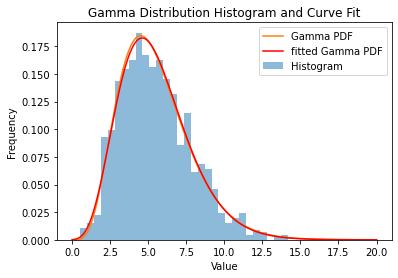

In [48]:
# Random samples drawn from gamma distribution by acceptance rejection method
alpha, beta = 5.5 ,1 
n = 1000
start_time = time.time()
samples_accrej2 = gamma_sample_normal(alpha, beta , n)
end_time = time.time()

plt.hist(samples_accrej2, bins=30, density=True, alpha=0.5, label='Histogram')

print("Time taken to draw {} samples from Gamma distribution: {:.6f} seconds".format(n,end_time - start_time))

plt.plot(x, gamma_dist.pdf(x,alpha,scale=(1/beta)),label='Gamma PDF')
# Fit a curve to the histogram using the Gamma distribution
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(samples_accrej2)
x = np.linspace(0, 20, 1000)
y = stats.gamma.pdf(x, fit_alpha, fit_loc, fit_beta)
plt.plot(x, y, 'r-', label='fitted Gamma PDF')

# Set the title and axis labels
plt.title('Gamma Distribution Histogram and Curve Fit')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the legend and plot
plt.legend()
plt.show()

In [29]:
# function for drawing gamma using the gamma for alpha less than 1

def gamma_sample_less1(alpha, beta, n):
    
    samples = []
    while len(samples) < n:
        u = np.random.rand()
        y = gamma_sample_normal(alpha+1,beta, 1)
        z = y*((u)**(1/alpha))
        z = z/beta
        samples.append(z)
    
    return np.array(samples)

Time taken to draw 1000 samples from Gamma distribution: 0.024560 seconds


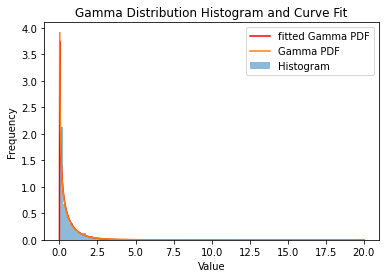

In [51]:
# Random samples drawn from gamma distribution
alpha, beta = 0.5 ,1 
n = 1000
start_time = time.time()
samples__less1 = gamma_sample_less1(alpha, beta , n)
end_time = time.time()

plt.hist(samples__less1, bins=30, density=True, alpha=0.5, label='Histogram')

print("Time taken to draw {} samples from Gamma distribution: {:.6f} seconds".format(n,end_time - start_time))

# Fit a curve to the histogram using the Gamma distribution
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(samples__less1)
x = np.linspace(0, 20, 1000)
y = stats.gamma.pdf(x, fit_alpha, fit_loc, fit_beta)
plt.plot(x, y, 'r-', label='fitted Gamma PDF')

plt.plot(x, gamma_dist.pdf(x,alpha,scale=(1/beta)),label='Gamma PDF')

# Set the title and axis labels
plt.title('Gamma Distribution Histogram and Curve Fit')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the legend and plot
plt.legend()
plt.show()

In [31]:
# ahrensdieter for alpha less than 1 : function for acceptance rejection method for drawing gamma using the gamma

def gamma_sample_ahrensdieter(alpha, beta, n):
    
    samples = []
    while len(samples) < n:
        u1 = np.random.rand()
        u2 = np.random.rand()
        if u1 > (math.e/(math.e +alpha)):
            x = -math.log((math.e +alpha)*(1-u1)/(alpha*math.e))
            y = x**(alpha -1)
        else:
            x = ((math.e +alpha)*(u1)/(math.e))**(1/alpha)
            y = math.exp(-x)
        
        if u2 < y:
            x = x/beta
            samples.append(x)
        
        
    
    return np.array(samples)

Time taken to draw 1000 samples from Gamma distribution: 0.001979 seconds


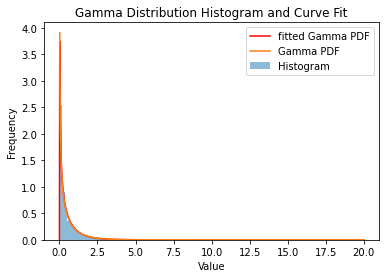

In [54]:
# Random samples drawn from gamma distribution

alpha, beta = 0.5 ,1 
n = 1000

start_time = time.time()
samples_ahrensdieter = gamma_sample_ahrensdieter(alpha, beta, n)
end_time = time.time()

plt.hist(samples_ahrensdieter, bins=30, density=True, alpha=0.5, label='Histogram')

print("Time taken to draw {} samples from Gamma distribution: {:.6f} seconds".format(n,end_time - start_time))

#Fit a curve to the histogram using the Gamma distribution
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(samples__less1)
x = np.linspace(0, 20, 1000)
y = stats.gamma.pdf(x, fit_alpha, fit_loc, fit_beta)
plt.plot(x, y, 'r-', label='fitted Gamma PDF')

plt.plot(x, gamma_dist.pdf(x,alpha,scale=(1/beta)),label='Gamma PDF')
# Set the title and axis labels
plt.title('Gamma Distribution Histogram and Curve Fit')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the legend and plot
plt.legend()
plt.show()

Time taken to draw 1000 samples from Gamma distribution: 0.000561 seconds


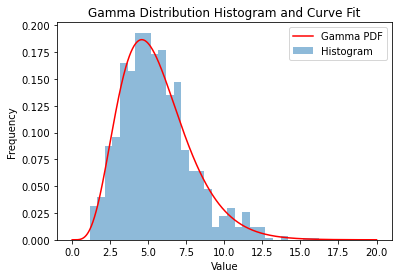

In [28]:
## Inbuilt Function based sampling
# Generate 1000 random samples from a Gamma distribution with shape parameter 2 and scale parameter 1

start_time = time.time()
samples = np.random.gamma(5.5, 1, 1000)
end_time = time.time()

print("Time taken to draw {} samples from Gamma distribution: {:.6f} seconds".format(n,end_time - start_time))


# Plot a histogram of the samples
plt.hist(samples, bins=30, density=True, alpha=0.5, label='Histogram')

# Fit a curve to the histogram using the Gamma distribution
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(samples)
x = np.linspace(0, 20, 1000)
y = stats.gamma.pdf(x, fit_alpha, fit_loc, fit_beta)
plt.plot(x, y, 'r-', label='Gamma PDF')

# Set the title and axis labels
plt.title('Gamma Distribution Histogram and Curve Fit')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the legend and plot
plt.legend()
plt.show()


In [ ]:
# Fit a curve to the histogram using the Gamma distribution
#fit_alpha, fit_loc, fit_beta = stats.gamma.fit(samples_accrej)
#y = stats.gamma.pdf(x, fit_alpha, fit_loc, fit_beta)
#plt.plot(x, y, 'r-', label='Gamma PDF')